## The double pendulum problem

This post is based on [an example of Plots.jl](https://docs.juliaplots.org/latest/user_gallery/misc/double_pendulum/#Double-Pendulum-Problem).

## Code

In [ ]:
using OrdinaryDiffEq, Plots; gr()
using Printf

In [ ]:
function pendulum!(du, u, p, t)
    # u[1] = theta1
    # u[2] = omega1
    # u[3] = theta2
    # u[4] = omega2
    
    (; M1, M2, L1, L2, G) = p

    du[1] = u[2]

    delta = u[3] - u[1]
    den1 = (M1 + M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    du[2] = (
        (
            M2 * L1 * u[2] * u[2] * sin(delta) * cos(delta) +
            M2 * G * sin(u[3]) * cos(delta) +
            M2 * L2 * u[4] * u[4] * sin(delta) - (M1 + M2) * G * sin(u[1])
        ) / den1
    )

    du[3] = u[4]

    den2 = (L2 / L1) * den1
    du[4] = (
        (
            -M2 * L2 * u[4] * u[4] * sin(delta) * cos(delta) +
            (M1 + M2) * G * sin(u[1]) * cos(delta) -
            (M1 + M2) * L1 * u[2] * u[2] * sin(delta) - (M1 + M2) * G * sin(u[3])
        ) / den2
    )
    nothing
end

pendulum! (generic function with 1 method)

In [ ]:
G = 9.8       # acceleration due to gravity, in m/s^2
L1 = 1.0      # length of pendulum 1 in m
L2 = 1.0      # length of pendulum 2 in m
L = L1 + L2   # maximal length of the combined pendulum
M1 = 1.0      # mass of pendulum 1 in kg
M2 = 1.0      # mass of pendulum 2 in kg
t_stop = 5.0  # how many seconds to simulate

5.0

In [ ]:
# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

0.0

In [ ]:
u0 = deg2rad.([th1, w1, th2, w2])

4-element Vector{Float64}:
  2.0943951023931953
  0.0
 -0.17453292519943295
  0.0

In [ ]:
p = (; M1, M2, L1, L2, G)

(M1 = 1.0, M2 = 1.0, L1 = 1.0, L2 = 1.0, G = 9.8)

In [ ]:
tspan = (0.0, t_stop)

(0.0, 5.0)

In [ ]:
prob = ODEProblem(pendulum!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 5.0)
u0: 4-element Vector{Float64}:
  2.0943951023931953
  0.0
 -0.17453292519943295
  0.0

In [ ]:
@time solve(prob, dense=true, alg=Vern7(), reltol=1e-10, abstol=1e-10);

  4.801410 seconds (20.07 M allocations: 1.311 GiB, 6.50% gc time, 99.99% compilation time)


In [ ]:
@time sol = solve(prob, dense=true, 
    alg=Vern7(), reltol=1e-10, abstol=1e-10)

  0.000413 seconds (3.97 k allocations: 404.250 KiB)


retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 327-element Vector{Float64}:
 0.0
 0.015120200135242772
 0.03461247124860289
 0.05621034906611724
 0.08063338298221337
 0.10655860257718384
 0.13371069061057467
 0.16136170833943062
 0.18910379555029622
 0.216500191087515
 ⋮
 4.877658909987774
 4.891048061088556
 4.906726954985946
 4.92395952857032
 4.940477265391924
 4.9570673499295275
 4.973347466199946
 4.989481530533818
 5.0
u: 327-element Vector{Vector{Float64}}:
 [2.0943951023931953, 0.0, -0.17453292519943295, 0.0]
 [2.093251192266732, -0.15130144360225076, -0.17507316706106824, -0.07138583688240614]
 [2.0884020066846594, -0.34620684293642423, -0.17735151407883185, -0.16197940762950855]
 [2.0785960375730372, -0.5617458491336331, -0.18190022469696743, -0.2583291215327368]
 [2.0619088616767502, -0.8045658145300556, -0.18945998215379264, -0.35897310430460627]
 [2.0377259296673795, -1.0606883684801727, -0.20000780534447987, -0.45198941094552436]
 [2.005312729

In [ ]:
dt = 0.01
t = range(0, t_stop, 500)
t

0.0:0.01002004008016032:5.0

In [ ]:
ss = sol(t)

t: 0.0:0.01002004008016032:5.0
u: 500-element Vector{Vector{Float64}}:
 [2.0943951023931953, 0.0, -0.17453292519943295, 0.0]
 [2.093892727794568, -0.1002718148594462, -0.17477031576780788, -0.047361688467315]
 [2.0923857338065837, -0.20051767898773526, -0.17548119651329958, -0.09446566162367707]
 [2.089874512316763, -0.3007111508060837, -0.17666169217282704, -0.14105372938857924]
 [2.0863597246275583, -0.4008248182697641, -0.17830533609426816, -0.18686676551089001]
 [2.0818423134938038, -0.5008298418502478, -0.18040305865053075, -0.23164427293860568]
 [2.076323519577815, -0.6006955317654576, -0.18294317148887201, -0.2751239894162722]
 [2.069804901918936, -0.7003889715061674, -0.18591134808623772, -0.31704154681648083]
 [2.0622883618913157, -0.7998747002091745, -0.18929060121668145, -0.3571301977165818]
 [2.0537761699948334, -0.8991144670078379, -0.1930612580721276, -0.3951206226371907]
 ⋮
 [-0.11613910894023596, -4.4776867736889425, 7.278673697988922, -1.7218077760104107]
 [-0.16053801

In [ ]:
s = reduce(hcat, ss.u)'

500×4 adjoint(::Matrix{Float64}) with eltype Float64:
  2.0944     0.0       -0.174533   0.0
  2.09389   -0.100272  -0.17477   -0.0473617
  2.09239   -0.200518  -0.175481  -0.0944657
  2.08987   -0.300711  -0.176662  -0.141054
  2.08636   -0.400825  -0.178305  -0.186867
  2.08184   -0.50083   -0.180403  -0.231644
  2.07632   -0.600696  -0.182943  -0.275124
  2.0698    -0.700389  -0.185911  -0.317042
  2.06229   -0.799875  -0.189291  -0.35713
  2.05378   -0.899114  -0.193061  -0.395121
  ⋮                               
 -0.116139  -4.47769    7.27867   -1.72181
 -0.160538  -4.38355    7.25991   -2.02178
 -0.203968  -4.28411    7.23818   -2.31501
 -0.24637   -4.17823    7.21354   -2.60104
 -0.287675  -4.06492    7.18608   -2.87941
 -0.327804  -3.94326    7.15587   -3.14969
 -0.366668  -3.81248    7.12299   -3.41151
 -0.404174  -3.67194    7.08753   -3.6646
 -0.44022   -3.52114    7.04958   -3.90883

In [ ]:
# theta1
s[:, 1]

500-element Vector{Float64}:
  2.0943951023931953
  2.093892727794568
  2.0923857338065837
  2.089874512316763
  2.0863597246275583
  2.0818423134938038
  2.076323519577815
  2.069804901918936
  2.0622883618913157
  2.0537761699948334
  ⋮
 -0.11613910894023596
 -0.16053801455439923
 -0.2039680558672177
 -0.2463703579186004
 -0.287675318032719
 -0.32780373308398425
 -0.366668020773485
 -0.404173506838206
 -0.4402197451947838

In [ ]:
# u[1] = theta1
# u[2] = omega1
# u[3] = theta2
# u[4] = omega2

x1 = +L1 * sin.(s[:, 1])
y1 = -L1 * cos.(s[:, 1])

x2 = +L2 * sin.(s[:, 3]) + x1
y2 = -L2 * cos.(s[:, 3]) + y1

500-element Vector{Float64}:
 -0.48480775301220824
 -0.48520163506531977
 -0.4863838171334237
 -0.4883559068223133
 -0.49112058298184197
 -0.4946815946474795
 -0.499043758925124
 -0.5042129571957659
 -0.5101961288529362
 -0.5170012616341575
  ⋮
 -1.537356613268544
 -1.5468788057341616
 -1.556884012872978
 -1.567350616246526
 -1.5782459039766115
 -1.5895261435074444
 -1.6011366077255564
 -1.6130116056633983
 -1.625074551166418

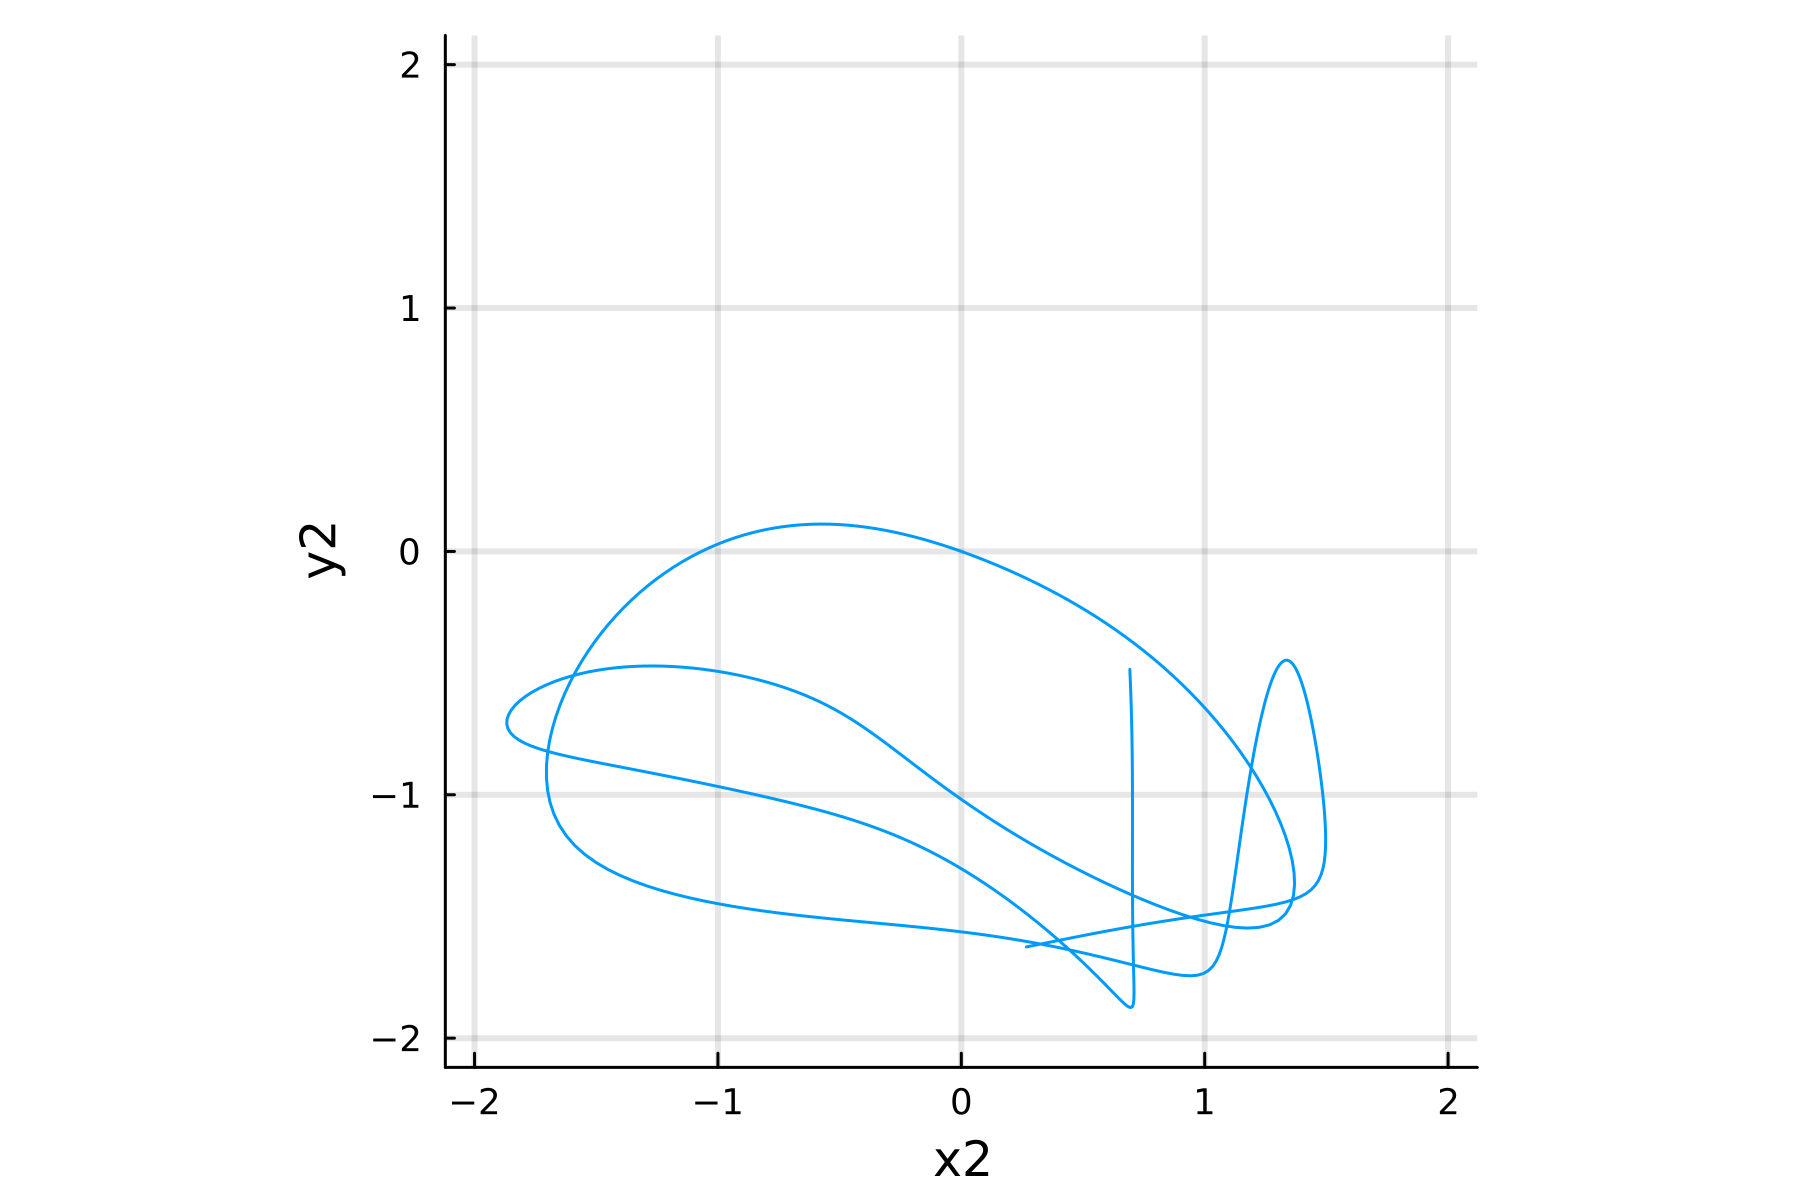

In [ ]:
plot(x2, y2,
    legend = false,
    grid = true,
    gridlinewidth = 2,
    aspect_ratio = :equal;
    xaxis = "x2",
    yaxis = "y2",
    xlims = (-2.0, 2.0),
    ylims = (-2.0, 2.0),
    widen = true,
    dpi = 300
)

In [ ]:
savefig("thumbnail.png")

"/home/mgj/workspace_wsl/mgjeon.github.io/posts/double-pendulum-julia/thumbnail.png"

In [ ]:
ts = [i for i in t]
ani = @animate for i in eachindex(x2)

    x = [0, x1[i], x2[i]]
    y = [0, y1[i], y2[i]]

    plot(x, y, aspect_ratio=1.0, legend = false)
    plot!(xlims = (-L, L), xticks = -L:0.5:L)
    plot!(ylims = (-L, 1), yticks = -L:0.5:1)
    scatter!(x, y, color = :red)

    x = x2[1:i]
    y = y2[1:i]

    plot!(x, y, linecolor = :orange)
    plot!(xlims = (-L, L), xticks = -L:0.5:L)
    plot!(ylims = (-L, 1), yticks = -L:0.5:1)
    scatter!(x, y, 
        color = :orange,
        markersize = 2,
        markerstrokewidth = 0,
        markerstrokecolor = :orange,
    )
    annotate!(-1.25, 0.5, "time= $(@sprintf("%.1f", round(ts[i]; digits=2))) s")
end every 10

Animation("/tmp/jl_I1Xmxe", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

In [ ]:
gif(ani, "ani_julia.mp4", fps = 10)

┌ Info: Saved animation to /home/mgj/workspace_wsl/mgjeon.github.io/posts/double-pendulum-julia/ani_julia.mp4
└ @ Plots /home/mgj/.julia/packages/Plots/du2dt/src/animation.jl:156


Plots.AnimatedGif("/home/mgj/workspace_wsl/mgjeon.github.io/posts/double-pendulum-julia/ani_julia.mp4")

{{< video https://www.youtube.com/watch?v=_-l5OeNBME4 >}}